## Tuning Hyperparamters using GridSearch: An Illustration with SVC

The Support Vector Machine (SVM) algorithm is a powerful technique that's well-suited to model a number of small to medium sized datasets which have many features, including non-linear features. The SVM algorithm can be used as a regressor and as a classifier, depending on the modeling task at hand. In this case we will use the support vector classifer (SVC) from scikit-learn libraries.   

The SVM algorithm transforms data using separating hyperplanes for finding ("grouping") fairly homogenous classes. At the risk of oversimplification, the SVM algorithm can be thought of as a combination of incorporating the learning style of knn method, and linear (and polynomial) regression based methods. This resulting algorithm, along with kernel-based transformations, can model highly complex relationships between datapoints. SVMs have traditionally been used for binary classfication tasks, but they just as easily be used for regression and multi-class classification. 

Here's is a very good background note on support vector machines: https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/

###### This post is grouped with other files in the UCI Bank Success dataset.


In [1]:
#Import the most commonly used libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('bank_data.csv')
df.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
weekday,mon,mon,mon,mon,mon


In [3]:
#Check datatype in the DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age             41188 non-null int64
job             41188 non-null object
marital         41188 non-null object
education       41188 non-null object
default         41188 non-null object
housing         41188 non-null object
loan            41188 non-null object
contact         41188 non-null object
month           41188 non-null object
weekday         41188 non-null object
duration        41188 non-null int64
campaign        41188 non-null int64
p_days          41188 non-null int64
Previous        41188 non-null int64
poutcome        41188 non-null object
emp_var_rate    41188 non-null float64
cpi             41188 non-null float64
cci             41188 non-null float64
euribor3m       41188 non-null float64
no_emp          41188 non-null float64
yes_no          41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usage: 6.6+ MB


In [4]:
#quick check for unusual values in numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
p_days,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
Previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp_var_rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cpi,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cci,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
no_emp,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [5]:
#extracting column names for prccessing categorical features
bank_feats = df.columns.values.tolist()

In [6]:
#Separating the dependent and independent variables 

X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

In [7]:
#check for df shape
X.shape

(41188, 20)

In [8]:
#extract labels from the categorical features

marital_labels = np.unique(X["marital"])
job_labels = np.unique(X["job"])
edu_labels = np.unique(X["education"])
default_labels = np.unique(X['default'])
housing_labels = np.unique(X['housing'])
loan_labels = np.unique(X['loan'])
contact_labels = np.unique(X['contact'])
month_labels = np.unique(X['month'])
wk_labels = np.unique(X["weekday"])
campaign_labels = np.unique(X['campaign'])
poutcome_labels = np.unique(X['poutcome'])

In [9]:
#initiate functions from the label encoding libraries
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
labelencoder_X = LabelEncoder()
onehotencoder = OneHotEncoder(categorical_features=[0])

In [10]:
#Label encoding for categorical variables

mar = pd.DataFrame(labelencoder_X.fit_transform(X["marital"]))
job = pd.DataFrame(labelencoder_X.fit_transform(X["job"]))
edu = pd.DataFrame(labelencoder_X.fit_transform(X["education"]))
dfl = pd.DataFrame(labelencoder_X.fit_transform(X["default"]))
hou = pd.DataFrame(labelencoder_X.fit_transform(X["housing"]))
lon = pd.DataFrame(labelencoder_X.fit_transform(X["loan"]))
con = pd.DataFrame(labelencoder_X.fit_transform(X["contact"]))
mon = pd.DataFrame(labelencoder_X.fit_transform(X["month"]))
wkd = pd.DataFrame(labelencoder_X.fit_transform(X["weekday"]))
cam = pd.DataFrame(labelencoder_X.fit_transform(X["campaign"]))
pot = pd.DataFrame(labelencoder_X.fit_transform(X["poutcome"]))

In [11]:
#Create new temporary dfs for onehotencoding categorical features

mar = pd.DataFrame(onehotencoder.fit_transform(mar).toarray())
mar.columns = marital_labels

job = pd.DataFrame(onehotencoder.fit_transform(job).toarray())
job.columns = job_labels

edu = pd.DataFrame(onehotencoder.fit_transform(edu).toarray())
edu.columns = edu_labels

dfl =  pd.DataFrame(onehotencoder.fit_transform(dfl).toarray())
dfl.columns = default_labels

hou = pd.DataFrame(onehotencoder.fit_transform(hou).toarray())
hou.columns = housing_labels

lon =  pd.DataFrame(onehotencoder.fit_transform(lon).toarray())
lon.columns = loan_labels

con =  pd.DataFrame(onehotencoder.fit_transform(con).toarray())
con.columns = contact_labels

mon = pd.DataFrame(onehotencoder.fit_transform(mon).toarray())
mon.columns = month_labels

wkd = pd.DataFrame(onehotencoder.fit_transform(wkd).toarray())
wkd.columns = wk_labels

cam = pd.DataFrame(onehotencoder.fit_transform(cam).toarray())
cam.columns = campaign_labels

pot = pd.DataFrame(onehotencoder.fit_transform(pot).toarray())
pot.columns = poutcome_labels

In [12]:
#Drop and concatinate with new tables

X.drop(["job", "marital", "education", "default", "housing", "loan", "contact", "month", "weekday", "campaign", "poutcome"], 
      axis=1, inplace=True)

In [13]:
cat_table1 = pd.DataFrame(pd.concat((mar, job, edu, dfl, hou, lon, con, mon, wkd, cam, pot), axis=1))

In [14]:
X = pd.DataFrame(pd.concat((X, cat_table1), axis=1))

In [15]:
X.shape

(41188, 104)

In [16]:
#split the dataset for training and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [17]:
#Scale the features for more accurate models and to conserve computational resources. 
#SVM models work best when features are scaled.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
# reshape y variables into an (ndim) array which is required for certain classifiers like the support vector machines suite
y_train = y_train.values             #convert to numpy array
r, c = y_train.shape           #extract shape
y = y_train.reshape(r,)        #reshape
y_train.shape

(32950, 1)

For building the SVC classifier, we have almost no idea about how an SVM method will perform on this dataset, so let's start with the base configuration and work our way into it. 

We'll start with the base hyperparameters, except we'll set the kernal='sigmoid' as it results in faster model fit. The other important hyperparamters are:

* Regularization term, 'C': the default value is 1.0, which is a reasonable starting point. Higher values of C tends to better fit the training set but may cause higher variance on the test set. Lower value of C can result in smoother decision surfaces along dimensions, but a higher value tends to improve accuracy on the training set by decreasing bias. In other words, a higher C value increases accuracy at the cost of robustness. 


* Kernel type, 'kernel': the SVM has support for fiting both linear and non-linear models and the kernels that support them too. Given the high number of features in this dataset, the rbf kernal, which is also the default, would be a good starting point. Specifying the kernel type informs our transformations ("kernel tricks") to capture closely related feature variables, and draw-up new decision boundaries; however, due to the complex mathematical operations involved using a more complex kernel can result in longer runtimes and the need for higher computational resources.


* RBF kernel's sensitivity hyperparameter, 'gamma': Given how the SVM model works to find an optimal separating hyperplane, it seeks out datapoints that can act as it's "support vectors" (markers). The Gaussian Radial Basis Function (RBF) is one such kernel to transform the data to locate optimal support vectors to separate decision boundaries among classes. Gamma sets the sphere of influence if each training instance, the lower it is the larger the influence of each instance in the training set, and vice versa. Lower gamma tends to better fit the training data, and setting a higher value improves regularization when the model overfits training data. 

In [19]:
from sklearn.svm import SVC
svc_model = SVC(kernel = 'sigmoid', C=1.0)

In [20]:
%%time
svc_model.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wall time: 48.8 s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
y_preds = svc_model.predict(X_test)

In [22]:
#Let's examine the performance of the model
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
print(classification_report(y_test, y_preds))
print(confusion_matrix(y_test, y_preds))

             precision    recall  f1-score   support

          0       0.92      0.95      0.94      7276
          1       0.51      0.37      0.43       962

avg / total       0.87      0.89      0.88      8238

[[6931  345]
 [ 602  360]]


In [24]:
svc_cm = confusion_matrix(y_preds, y_test, [1,0])

Text(0.5,1,'Support Vector Classifier')

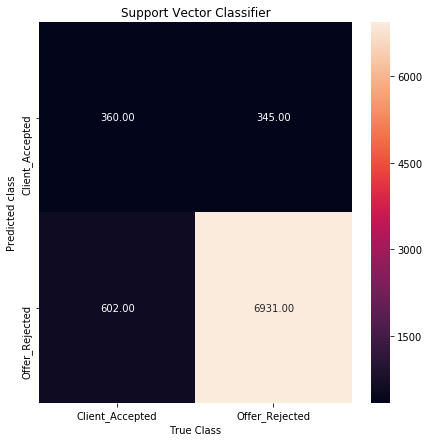

In [25]:
plt.figure(figsize=(7,7))
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Client_Accepted", "Offer_Rejected"] , yticklabels = ["Client_Accepted", "Offer_Rejected"] )
plt.ylabel('Predicted class')
plt.xlabel('True Class')
plt.title('Support Vector Classifier')

### Tune the model using GridSearch

In [26]:
from sklearn.grid_search import GridSearchCV

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


For the purpose of this illustration, let's construct a fairly simple, yet practical set of hyperparameters. 
In our grid parameters, let's try out 4 different values for C (0.1, 1, 10, 100) and gamma (1, 0.1, 0.001, 0.005). 

Let's examine the efficacy of two kernal types: 'rbf', and 'sigmoid'.

In [27]:
grid_params = {'C':[0.1, 1, 10, 100], 'gamma':[1, 0.1, 0.001, 0.005], 'kernel': ['rbf','sigmoid']}

In [28]:
grid = GridSearchCV(SVC(),grid_params,refit=True,verbose=3)

There's a chance that the grid fit function may throw up an error. 
One of the possible errors, which I encountered, was "too many indices in the array" which pertained to the 'y_train' dataset.  

Upon examining the array shapes of X_train[n, i] and y_train[n, 1], both had same no. of rows but y_train had an 
unnecessary column. The y_train array was reshaped into a 1d array using.

c, r = y_train.shape

y_train = y_train.reshape(c,)

(Ref: https://stackoverflow.com/questions/42928855/gridsearchcv-error-too-many-indices-in-the-array)

In [1]:
###### Warning: Running the grid.fit can take a couple of hours, depending on your system. 

In [29]:
%%time
grid.fit(X_train, y_train.ravel())

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............. C=0.1, gamma=1, kernel=rbf, score=0.888383 - 4.6min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.6min remaining:    0.0s


[CV] ............. C=0.1, gamma=1, kernel=rbf, score=0.888373 - 4.6min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  9.2min remaining:    0.0s


[CV] ............. C=0.1, gamma=1, kernel=rbf, score=0.888373 - 4.6min
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ......... C=0.1, gamma=1, kernel=sigmoid, score=0.846413 -  28.3s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ......... C=0.1, gamma=1, kernel=sigmoid, score=0.839115 -  31.6s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ......... C=0.1, gamma=1, kernel=sigmoid, score=0.836930 -  40.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........... C=0.1, gamma=0.1, kernel=rbf, score=0.888383 - 3.5min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........... C=0.1, gamma=0.1, kernel=rbf, score=0.888373 - 3.1min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........... C=0.1, gamma=0.1, kernel=rbf, score=0.888373 - 3.2min
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] .

[CV] .......... C=10, gamma=0.001, kernel=rbf, score=0.913055 -  33.9s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .......... C=10, gamma=0.001, kernel=rbf, score=0.909405 -  35.5s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .......... C=10, gamma=0.001, kernel=rbf, score=0.904307 -  32.9s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ...... C=10, gamma=0.001, kernel=sigmoid, score=0.908776 -  35.5s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ...... C=10, gamma=0.001, kernel=sigmoid, score=0.906583 -  36.2s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ...... C=10, gamma=0.001, kernel=sigmoid, score=0.900300 -  35.3s
[CV] C=10, gamma=0.005, kernel=rbf ...................................
[CV] .......... C=10, gamma=0.005, kernel=rbf, score=0.907957 -  42.0s
[CV] C=10, gamma=0.005, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed: 172.9min finished


Wall time: 2h 54min 34s


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.001, 0.005], 'kernel': ['rbf', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [30]:
#inspect the best params
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [31]:
grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Let's take a look at the gridsearch results. 

Our grid.best_params_ shows that:

* The 'rbf' kernel performs better than the 'sigmoid' kernal. This calls for further investigation. Since we only checked for two kernels, the chances of finding the "best" kernel was 0.5! Looking at the dataset, we should analyse the model further with the 'poly' kernel.  

* The C parameter that performed best was found to be 100. Given that it is the extreme value we set on the right may indicate the need for additional investigation. This is because if the C value was somewhere inbetween 0.1 and 100, there would've been a higher chance of finding the optimal C value. In this case, the optimal C value may lie beyond 100, but we did not check for it. Perhaps a run grid search again with new hyperparameters. 

Once the results are investigated and a model is set, we should satisfy ourselves that the model is performing adequately with respect to the acceptance parameters. If not, other models need to be considered.

In [32]:
grid_predictions = grid.predict(X_test)

In [33]:
print(confusion_matrix(y_test,grid_predictions))

[[7059  217]
 [ 543  419]]


In [34]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95      7276
          1       0.66      0.44      0.52       962

avg / total       0.90      0.91      0.90      8238



In [35]:
grid_cm = confusion_matrix(grid_predictions, y_test, [1,0])

Text(0.5,1,'Grid-tuned SVC')

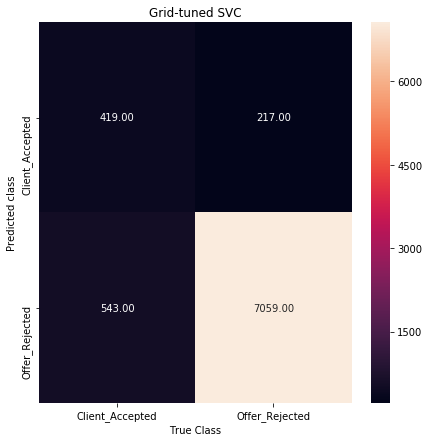

In [36]:
plt.figure(figsize=(7,7))
sns.heatmap(grid_cm, annot=True, fmt='.2f',xticklabels = ["Client_Accepted", "Offer_Rejected"] , yticklabels = ["Client_Accepted", "Offer_Rejected"] )
plt.ylabel('Predicted class')
plt.xlabel('True Class')
plt.title('Grid-tuned SVC')

In [49]:
svc_model_best = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', 
                     degree=3, gamma=0.001, kernel='rbf', max_iter=-1, probability=False, random_state=52, 
                     shrinking=True, tol=0.001, verbose=False)

In [50]:
svc_model_best.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=52, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
y_preds_best = svc_model.predict(X_test)

In [52]:
print(classification_report(y_test, y_preds_best))
print(confusion_matrix(y_test, y_preds_best))

             precision    recall  f1-score   support

          0       0.92      0.95      0.94      7276
          1       0.51      0.37      0.43       962

avg / total       0.87      0.89      0.88      8238

[[6931  345]
 [ 602  360]]


In [53]:
svc_cm_best = confusion_matrix(y_preds_best, y_test, [1,0])

Text(0.5,1,'Support Vector Classifier')

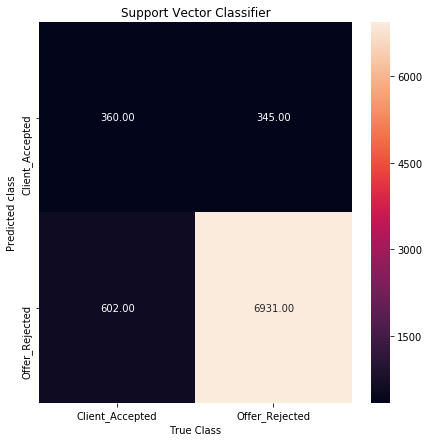

In [54]:
plt.figure(figsize=(7,7))
sns.heatmap(svc_cm_best, annot=True, fmt='.2f',xticklabels = ["Client_Accepted", "Offer_Rejected"] , yticklabels = ["Client_Accepted", "Offer_Rejected"] )
plt.ylabel('Predicted class')
plt.xlabel('True Class')
plt.title('Support Vector Classifier')